<a href="https://colab.research.google.com/github/Ravi-Teja2111/quantum-molecular-ground-state-vqe/blob/main/GroundStateofH2Molecule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show qiskit

Name: qiskit
Version: 2.2.3
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: dill, numpy, rustworkx, scipy, stevedore, typing-extensions
Required-by: 


In [ ]:
!pip install qiskit pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.3 MB/s eta 0:00:00


Define the Molecule

In [ ]:
import numpy as np
from pyscf import ao2mo, gto, mcscf, scf

In [ ]:
distance = 0.735
a = distance / 2
mol = gto.Mole()
mol.build(
    verbose=4,
    atom=[
        ["H", (0, 0, -a)],
        ["H", (0, 0, a)],
    ],
    basis="sto-6g",
    spin=0,
    charge=0,
    symmetry="Dooh",
)

System: uname_result(system='Linux', node='051135f62cca', release='6.6.105+', version='#1 SMP Thu Oct  2 10:42:05 UTC 2025', machine='x86_64')  Threads 2
Python 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy 2.0.2  scipy 1.16.3  h5py 3.15.1
Date: Mon Dec 29 05:16:05 2025
PySCF version 2.11.0
PySCF path  /usr/local/lib/python3.12/dist-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 2
[INPUT] num. electrons = 2
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry Dooh subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 H      0.000000000000   0.000000000000  -0.367500000000 AA    0.000000000000   0.000000000000  -0.694474350778 Bohr   0.0
[INPUT]  2 H      0.000000000000   0.000000000000   0.367500000000 AA    0.000000000000   0.000000000000   0.694474350778 Bohr   0.0

nuclear repulsi

In [ ]:
mf = scf.RHF(mol)
mf.scf()

print("Nuclear energy:      ", mf.energy_nuc())
print("Electronic energy:   ", mf.energy_elec()[0])
print("Total energy:        ", mf.energy_tot())
print("Electronic (no nuc): ", mf.energy_tot() - mol.energy_nuc())




******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp9c_1e25g
max_memory 4000 MB (current use 163 MB)
Freeze 0 electrons in irreps []
    2 free electrons in irreps A1g A1u
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -0.780220306418399
HOMO (A1g) = -0.526699095545974  LUMO (A1u) = 0.597107093801938
cycle= 1 E= -1.12562866842744  delta_E= -0.345  |g|=    0  |ddm|= 0.848
HOMO (A1g) = -0.584970785205619  LUMO (A1u) = 0.673146116787527
cycle= 2 E= -1.12562866842744  delta_E=    0  |g|=    0  |ddm|=    0
HOMO (A1g) = -0.584970785205619  LUMO (A1u) = 0.673146116787527
Extra cycle  E= -1.12562866842744  delta_E=    0  |g|=    0  |ddm|=   

In [ ]:
active_space = range(mol.nelectron // 2 - 1, mol.nelectron // 2 + 1)

Generate Fermionic Hamiltonian


In [ ]:
E1 = mf.kernel()
mx = mcscf.CASCI(mf, ncas=2, nelecas=(1, 1))
mo = mx.sort_mo(active_space, base=0)
E2 = mx.kernel(mo)[:2]



******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmplt7hy3ss
max_memory 4000 MB (current use 223 MB)
Freeze 0 electrons in irreps []
    2 free electrons in irreps A1g A1u
Set gradient conv threshold to 3.16228e-05
init E= -1.12562866842744
HOMO (A1g) = -0.584970785205619  LUMO (A1u) = 0.673146116787527
cycle= 1 E= -1.12562866842744  delta_E=    0  |g|=    0  |ddm|=    0
HOMO (A1g) = -0.584970785205619  LUMO (A1u) = 0.673146116787527
Extra cycle  E= -1.12562866842744  delta_E=    0  |g|=    0  |ddm|=    0
converged SCF energy = -1.12562866842744
Symmetries of active orbitals: A1g A1u
Active space CI wfn symmetry = A1g

******** <class 'pyscf.mcscf.casci_symm.SymA

In [ ]:
h1e, ecore = mx.get_h1eff()
h2e = ao2mo.restore(1, mx.get_h2eff(), mx.ncas)

Mapping the Hamiltonian
The Cholesky function helps us obtain a low-rank decomposition of the two-electron terms in the Hamiltonian.

In [ ]:
def cholesky(V, eps):

    no = V.shape[0]
    chmax, ng = 20 * no, 0
    W = V.reshape(no**2, no**2)
    L = np.zeros((no**2, chmax))
    Dmax = np.diagonal(W).copy()
    nu_max = np.argmax(Dmax)
    vmax = Dmax[nu_max]
    while vmax > eps:
        L[:, ng] = W[:, nu_max]
        if ng > 0:
            L[:, ng] -= np.dot(L[:, 0:ng], (L.T)[0:ng, nu_max])
        L[:, ng] /= np.sqrt(vmax)
        Dmax[: no**2] -= L[: no**2, ng] ** 2
        ng += 1
        nu_max = np.argmax(Dmax)
        vmax = Dmax[nu_max]
    L = L[:, :ng].reshape((no, no, ng))
    print(
        "accuracy of Cholesky decomposition ",
        np.abs(np.einsum("prg,qsg->prqs", L, L) - V).max(),
    )
    return L, ng

In [ ]:
from qiskit.quantum_info import SparsePauliOp

H = SparsePauliOp(["XX", "YY", "ZZ"], coeffs=[1.0 + 0.0j, 1.0 + 0.0j, 1.0 + 0.0j])
print(H)

SparsePauliOp(['XX', 'YY', 'ZZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j])


In [ ]:
def identity(n):
    return SparsePauliOp.from_list([("I" * n, 1)])


def creators_destructors(n, mapping="jordan_wigner"):
    c_list = []
    if mapping == "jordan_wigner":
        for p in range(n):
            if p == 0:
                ell, r = "I" * (n - 1), ""
            elif p == n - 1:
                ell, r = "", "Z" * (n - 1)
            else:
                ell, r = "I" * (n - p - 1), "Z" * p
            cp = SparsePauliOp.from_list([(ell + "X" + r, 0.5), (ell + "Y" + r, 0.5j)])
            c_list.append(cp)
    else:
        raise ValueError("Unsupported mapping.")
    d_list = [cp.adjoint() for cp in c_list]
    return c_list, d_list

build_hamiltonian uses the cholesky, identity, and creators_destructors functions to create the final Hamiltonian suitable for running on a quantum computer

In [ ]:
def build_hamiltonian(ecore: float, h1e: np.ndarray, h2e: np.ndarray) -> SparsePauliOp:
    ncas, _ = h1e.shape

    C, D = creators_destructors(2 * ncas, mapping="jordan_wigner")
    Exc = []
    for p in range(ncas):
        Excp = [C[p] @ D[p] + C[ncas + p] @ D[ncas + p]]
        for r in range(p + 1, ncas):
            Excp.append(
                C[p] @ D[r]
                + C[ncas + p] @ D[ncas + r]
                + C[r] @ D[p]
                + C[ncas + r] @ D[ncas + p]
            )
        Exc.append(Excp)

    # low-rank decomposition of the Hamiltonian
    Lop, ng = cholesky(h2e, 1e-6)
    t1e = h1e - 0.5 * np.einsum("pxxr->pr", h2e)

    H = ecore * identity(2 * ncas)
    # one-body term
    for p in range(ncas):
        for r in range(p, ncas):
            H += t1e[p, r] * Exc[p][r - p]
    # two-body term
    for g in range(ng):
        Lg = 0 * identity(2 * ncas)
        for p in range(ncas):
            for r in range(p, ncas):
                Lg += Lop[p, r, g] * Exc[p][r - p]
        H += 0.5 * Lg @ Lg

    return H.chop().simplify()

In [ ]:
H = build_hamiltonian(ecore, h1e, h2e)
print(H)

accuracy of Cholesky decomposition  1.8768594323382656e-16
SparsePauliOp(['IIII', 'IIIZ', 'IZII', 'IIZI', 'ZIII', 'IZIZ', 'IIZZ', 'ZIIZ', 'IZZI', 'ZZII', 'ZIZI', 'YYYY', 'XXYY', 'YYXX', 'XXXX'],
              coeffs=[-0.09820182+0.j, -0.1740751 +0.j, -0.1740751 +0.j,  0.2242933 +0.j,
  0.2242933 +0.j,  0.16891402+0.j,  0.1210099 +0.j,  0.16631441+0.j,
  0.16631441+0.j,  0.1210099 +0.j,  0.17504456+0.j,  0.04530451+0.j,
  0.04530451+0.j,  0.04530451+0.j,  0.04530451+0.j])


In [ ]:
!pip install pylatexenc

In [ ]:
from qiskit.circuit.library import EfficientSU2


/tmp/ipython-input-3997266894.py:1: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  SU2_ansatz = EfficientSU2(


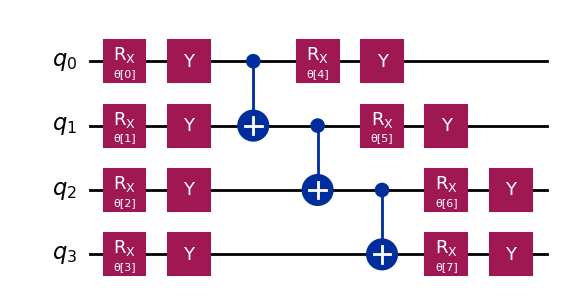

In [ ]:
SU2_ansatz = EfficientSU2(
    num_qubits=4,
    su2_gates=["rx", "y"],
    entanglement="linear",
    reps=1
)
SU2_ansatz.decompose().draw(output="mpl")

In [ ]:
print(SU2_ansatz.decompose().depth())

7


In [ ]:
num_params = SU2_ansatz.num_parameters
print(num_params)

8


In [ ]:
from scipy.optimize import minimize

Here We have 3 different types of Algorithms,
Like COBYLA, SLSQP,Nerds Algorithms,
In these i am selecting SLSQP:Sequential Least Squares Programming.

COBYLA - Gradient free optimizer,
SLSQP- It has faster convergence, Gradient based, Good for small molecules.

In [ ]:
!pip install -U qiskit qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.2 MB/s eta 0:00:00


In [ ]:
import qiskit
print(qiskit.__version__)

2.2.3


In [ ]:
from qiskit_aer.primitives import Estimator


In [ ]:
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator
from scipy.optimize import minimize
import numpy as np

# -------- Hamiltonian Example (H2-like) --------
H = SparsePauliOp.from_list([
    ("IIIZ", -0.042078976),
    ("IIZI", -0.042078976),
    ("IZII", -0.042078976),
    ("ZIII", -0.042078976),
    ("IIZZ", 0.17771287),
    ("IZIZ", 0.17771287),
    ("ZIIZ", 0.17771287),
    ("ZIZI", 0.17771287),
])

# -------- Ansatz --------
ansatz = EfficientSU2(
    num_qubits=4,
    entanglement="linear",
    su2_gates=["rx", "ry"],    # "y" is invalid → must be "ry"
    reps=1
)

num_params = ansatz.num_parameters
print("Parameters:", num_params)

# -------- Cost Function --------
estimator = Estimator()

def cost_func(params):
    qc = ansatz.assign_parameters(params)
    result = estimator.run([qc], [H]).result()
    return result.values[0]

# -------- Initial Guess --------
x0 = np.random.rand(num_params)

# -------- Optimization --------
res = minimize(cost_func, x0, method="SLSQP", options={"maxiter": 100})

print("Optimal Parameters:", res.x)
print("Minimum Energy:", res.fun)


/tmp/ipython-input-3409878458.py:20: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  ansatz = EfficientSU2(


Parameters: 16
Optimal Parameters: [-300447.39921271 -255203.24418402 -228241.24463603 -351032.77889959
 -300890.96894203 -104831.72932247 -250890.65831503 -434101.54439143
 -407621.83396644  170518.54224574 -109113.51580156  -83641.53036951
 -595814.06487355 -588790.04878465 -126618.84237859 -122687.80854414]
Minimum Energy: 0.021313308421875


In [ ]:
from pyscf import gto, scf

# Example H2 molecule
mol = gto.M(
    atom='H 0 0 0; H 0 0 0.74',  # bond length in angstrom
    basis='sto-3g'
)

# Run Hartree-Fock
mf = scf.RHF(mol)
hf_energy = mf.kernel()   # total electronic energy
print("Hartree-Fock Energy:", hf_energy)


converged SCF energy = -1.11675930739643
Hartree-Fock Energy: -1.1167593073964255


In [ ]:
vqe_energy = res.fun   # minimum energy from VQE
print("VQE Energy:", vqe_energy)


VQE Energy: 0.021313308421875


In [ ]:
print("Hartree-Fock Energy:", hf_energy)
print("VQE Energy:", vqe_energy)
print("Energy difference (correlation energy):", hf_energy - vqe_energy)


Hartree-Fock Energy: -1.1167593073964255
VQE Energy: 0.021313308421875
Energy difference (correlation energy): -1.1380726158183005
